In [ ]:
!pip install Kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Importing Dataset from Kaggle

In [ ]:
! kaggle datasets download -d andrewmvd/pediatric-pneumonia-chest-xray

 99% 1.14G/1.14G [00:10<00:00, 169MB/s]
100% 1.14G/1.14G [00:10<00:00, 114MB/s]


In [ ]:
from zipfile import ZipFile
data = '/content/pediatric-pneumonia-chest-xray.zip'

with ZipFile(data, 'r') as zip:
  zip.extractall()

In [ ]:
!ls

 drive	      'Pediatric Chest X-ray Pneumonia'     sample_data
 kaggle.json   pediatric-pneumonia-chest-xray.zip


# Importing Libraries

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Data Importing and Preprocessing

In [ ]:
#Make a list of images with mask
pneumonia = os.listdir('/content/Pediatric Chest X-ray Pneumonia/train/PNEUMONIA')
#Make a list of images without mask
normal = os.listdir('/content/Pediatric Chest X-ray Pneumonia/train/NORMAL')

In [ ]:
print(pneumonia[0:5])
print(normal[0:5])

['person1402_virus_2405.jpeg', 'person1504_bacteria_3931.jpeg', 'person101_virus_188.jpeg', 'person825_bacteria_2736.jpeg', 'person805_bacteria_2712.jpeg']
['IM-0666-0001-0001.jpeg', 'NORMAL2-IM-1222-0001.jpeg', 'NORMAL2-IM-1302-0001.jpeg', 'IM-0505-0001-0001.jpeg', 'IM-0151-0001.jpeg']


In [ ]:
print('Number of images with pneumonia:', len(pneumonia))
print('Number of images without pneumonia:', len(normal))

Number of images with pneumonia: 3883
Number of images without pneumonia: 1349


In [ ]:
#Creating labels for the two classes
pneumonia_label = [1]*len(pneumonia)
normal_label = [0]*len(normal)

In [ ]:
print(pneumonia_label[0:5])
print(normal_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = pneumonia_label + normal_label

print(len(labels))

5232


# Image Preprocessing
* Resize images
* Convert Images to NumPy arrays

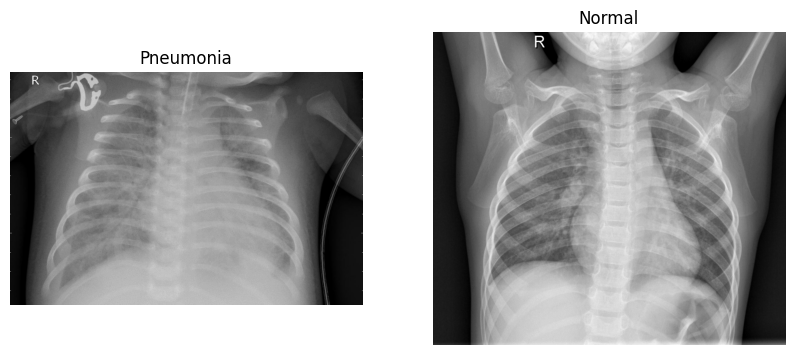

In [ ]:

# Read and convert images to grayscale
pneumonia_img_path = '/content/Pediatric Chest X-ray Pneumonia/train/PNEUMONIA/person1000_bacteria_2931.jpeg'
nomask_img_path = '/content/Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0115-0001.jpeg'

pneumonia_img = mpimg.imread(pneumonia_img_path)
nomask_img = mpimg.imread(nomask_img_path)

# Convert images to grayscale
pneumonia_gray = Image.fromarray(pneumonia_img).convert('L')
nomask_gray = Image.fromarray(nomask_img).convert('L')

# Display side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(pneumonia_gray, cmap='gray')
plt.title('Pneumonia')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(nomask_gray, cmap='gray')
plt.title('Normal')
plt.axis('off')

plt.show()

In [ ]:
#Image Processing, Resizing and converting to numpy array and storing in a list 'dataset'.
pneumonia_path = '/content/Pediatric Chest X-ray Pneumonia/train/PNEUMONIA/'

dataset = []

for img_file in pneumonia:
  image = Image.open(pneumonia_path + img_file)
  image = image.resize((128,128))  #resize the image in 128 x 128 size
  image = image.convert('RGB')  #Convert all the images to RGB colour channel
  image = np.array(image)    #Converting the iages into numpy array
  dataset.append(image)


normal_path = '/content/Pediatric Chest X-ray Pneumonia/train/NORMAL/'

for img_file in normal:
  image = Image.open(normal_path + img_file)
  image = image.resize((128,128))  #resize the image in 128 x 128 size
  image = image.convert('RGB')  #Convert all the images to RGB colour channel
  image = np.array(image)    #Converting the iages into numpy array
  dataset.append(image)


In [ ]:
dataset[0]

array([[[ 63,  63,  63],
        [164, 164, 164],
        [ 41,  41,  41],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 62,  62,  62],
        [161, 161, 161],
        [ 33,  33,  33],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 58,  58,  58],
        [180, 180, 180],
        [112, 112, 112],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [ ]:
dataset[0].shape

(128, 128, 3)

In [ ]:
len(dataset)

5232

* List dataset contains 5232 images in the form of numpy arrays.

In [ ]:
#Converting list dataset and lables into numpy array
x = np.array(dataset)
y = np.array(labels)

print('type of dataset:',type(x))
print('type of labels:',type(y))

type of dataset: <class 'numpy.ndarray'>
type of labels: <class 'numpy.ndarray'>


In [ ]:
print('shape of images',x.shape)
print('shape of labels',y.shape)

shape of images (5232, 128, 128, 3)
shape of labels (5232,)


# Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(5232, 128, 128, 3) (4185, 128, 128, 3) (1047, 128, 128, 3)


In [ ]:
print(y.shape, y_train.shape, y_test.shape)

(5232,) (4185,) (1047,)


In [ ]:
#Pixel Normalisation of the training and testing images
x_train_scaled = x_train/255
x_test_scaled = x_test/255

* Now the pixel values of all the images lies between 0 and 1

# Building Neural Netwrok Architecture

In [ ]:
classes = 2

model = keras.Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu',input_shape = (128,128,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten()) #ANN

#Dense layers start with 128 neurons in the first layer
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.4))  #Dropout layer prevents overfitting

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.4))

#Output layer
model.add(Dense(classes, activation = 'sigmoid'))  #Binary classification for mask and no mask

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

# MobileNet Architecture

In [ ]:
#Load the MobileNet Model
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
mobilenet_model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReL

In [ ]:
#Freesing the remaining layers of the MobileNet so that they do not trained during backpropogation
for layers in mobilenet_model.layers:
  layers.trainable = False

In [ ]:
#adding the top layer in pre trained MobileNetV2
mobilenet_model = Sequential([
    mobilenet_model,
    Flatten(),
    Dense(classes, activation='sigmoid')
])

# Model Training

* Custome Model Training

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(x_train_scaled,y_train,
                    epochs = 50,
                    batch_size = 32,
                    validation_data=(x_test_scaled, y_test),
                    validation_split=0.1,
                    )

Epoch 1/50
131/131 [==============================] - 11s 28ms/step - loss: 0.5761 - accuracy: 0.7297 - val_loss: 0.2165 - val_accuracy: 0.9436
Epoch 2/50
131/131 [==============================] - 3s 21ms/step - loss: 0.2435 - accuracy: 0.8996 - val_loss: 0.1157 - val_accuracy: 0.9532
Epoch 3/50
131/131 [==============================] - 3s 21ms/step - loss: 0.1933 - accuracy: 0.9319 - val_loss: 0.1305 - val_accuracy: 0.9589
Epoch 4/50
131/131 [==============================] - 2s 18ms/step - loss: 0.1419 - accuracy: 0.9479 - val_loss: 0.1177 - val_accuracy: 0.9647
Epoch 5/50
131/131 [==============================] - 2s 19ms/step - loss: 0.1398 - accuracy: 0.9503 - val_loss: 0.0942 - val_accuracy: 0.9675
Epoch 6/50
131/131 [==============================] - 2s 18ms/step - loss: 0.1086 - accuracy: 0.9606 - val_loss: 0.1260 - val_accuracy: 0.9522
Epoch 7/50
131/131 [==============================] - 3s 19ms/step - loss: 0.1199 - accuracy: 0.9613 - val_loss: 0.1134 - val_accuracy: 0.963

* Pre-trained MobileNetV2 model training

In [ ]:
#Model compilation
mobilenet_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
#Training the model to 10 epochs
mobilenet_hist = mobilenet_model.fit(x_train_scaled,y_train,
                    batch_size = 32,
                    epochs = 10,
                    validation_data = (x_test_scaled,y_test),
                    validation_split = 0.1
                    )

Epoch 1/10
131/131 [==============================] - 9s 42ms/step - loss: 0.3027 - accuracy: 0.9341 - val_loss: 0.1386 - val_accuracy: 0.9628
Epoch 2/10
131/131 [==============================] - 3s 24ms/step - loss: 0.0574 - accuracy: 0.9795 - val_loss: 0.1415 - val_accuracy: 0.9513
Epoch 3/10
131/131 [==============================] - 3s 22ms/step - loss: 0.0402 - accuracy: 0.9864 - val_loss: 0.2222 - val_accuracy: 0.9513
Epoch 4/10
131/131 [==============================] - 3s 21ms/step - loss: 0.0291 - accuracy: 0.9909 - val_loss: 0.0749 - val_accuracy: 0.9752
Epoch 5/10
131/131 [==============================] - 3s 21ms/step - loss: 0.0064 - accuracy: 0.9981 - val_loss: 0.0960 - val_accuracy: 0.9761
Epoch 6/10
131/131 [==============================] - 3s 21ms/step - loss: 0.0026 - accuracy: 0.9998 - val_loss: 0.0740 - val_accuracy: 0.9742
Epoch 7/10
131/131 [==============================] - 3s 25ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0752 - val_accuracy: 0.9723

# Model Evaluation

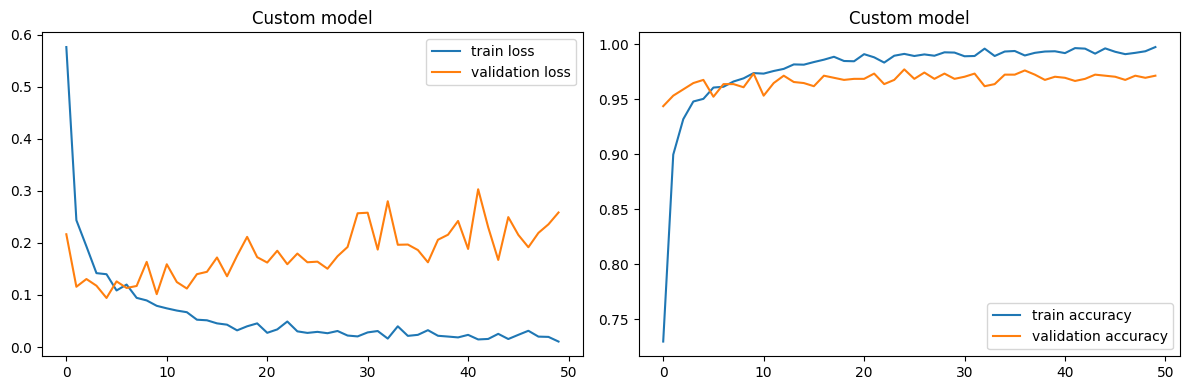

In [ ]:
fig, axis = plt.subplots(1,2,figsize = (12,4))


axis[0].plot(history.history['loss'], label = 'train loss')
axis[0].plot(history.history['val_loss'], label = 'validation loss')
axis[0].legend()
axis[0].set_title('Custom model')

axis[1].plot(history.history['accuracy'], label = 'train accuracy')
axis[1].plot(history.history['val_accuracy'], label = 'validation accuracy')
axis[1].legend()
axis[1].set_title('Custom model')

plt.tight_layout()
plt.show()

In [ ]:
model.save('custom_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


* MobileNet Model Evaluation

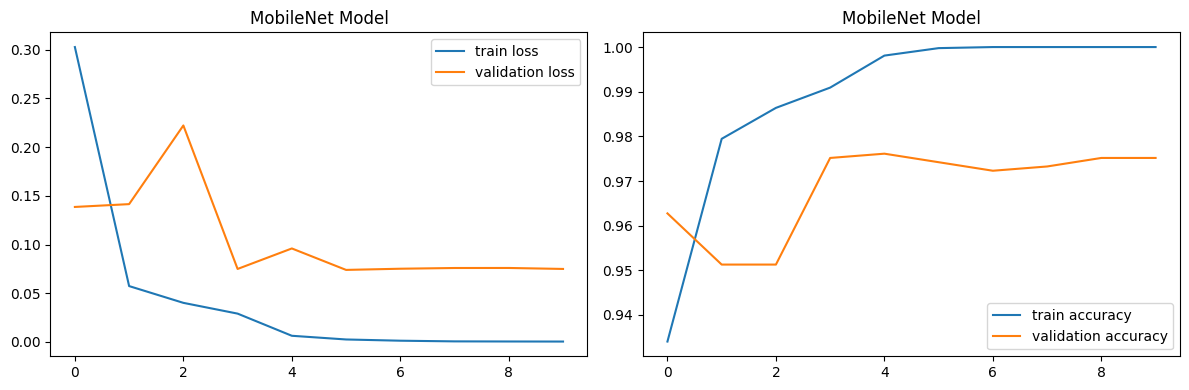

In [ ]:
fig, axis = plt.subplots(1,2,figsize = (12,4))


axis[0].plot(mobilenet_hist.history['loss'], label = 'train loss')
axis[0].plot(mobilenet_hist.history['val_loss'], label = 'validation loss')
axis[0].legend()
axis[0].set_title('MobileNet Model')

axis[1].plot(mobilenet_hist.history['accuracy'], label = 'train accuracy')
axis[1].plot(mobilenet_hist.history['val_accuracy'], label = 'validation accuracy')
axis[1].legend()
axis[1].set_title('MobileNet Model')

plt.tight_layout()
plt.show()

In [ ]:
#saving the mobilenet model
mobilenet_model.save('mobilenet_model.h5')

# Model Evaluation

In [ ]:
#Function to preprocess the image for prediction
def image_processing(image_path):
  input_image = cv2.imread(image_path)  #read image as numpy array
  input_image = cv2.resize(input_image, (128,128))  #resize the image with the input size of 128 x 128
  processed_img = input_image/255  #pixcel normalization
  processed_img = np.reshape(processed_img, [1,128,128,3])  #reshape the image for one i
  return processed_img

In [ ]:
# Function to evaluate the model on the test dataset

test_folder_path = '/content/Pediatric Chest X-ray Pneumonia/test/'

def evaluate_model(test_folder_path, model):
    true_labels = []
    predicted_labels = []

    pneumonia_folder = os.path.join(test_folder_path, 'PNEUMONIA')
    normal_folder = os.path.join(test_folder_path, 'NORMAL')

    # Evaluate pneumonia cases
    for img_name in os.listdir(pneumonia_folder):
        img_path = os.path.join(pneumonia_folder, img_name)
        processed_img = image_processing(img_path)
        prediction = model.predict(processed_img)
        predicted_labels.append(1)  # Assuming 1 is the label for pneumonia
        true_labels.append(1)

    # Evaluate normal cases
    for img_name in os.listdir(normal_folder):
        img_path = os.path.join(normal_folder, img_name)
        processed_img = image_processing(img_path)
        prediction = model.predict(processed_img)
        predicted_labels.append(0)  # Assuming 0 is the label for normal
        true_labels.append(0)

      # Calculate evaluation metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('Confusion Matrix:')
    print(conf_matrix)

In [ ]:
evaluate_model(test_folder_path, mobilenet_model)

1/1 [==============================] - 0s 21ms/step
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[234   0]
 [  0 390]]
